## Togo Solar Data EDA

Step 1. Import Libraries and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import os

Step 2: Data Loading and Initial Inspection

In [2]:

# Correct path from notebooks/ folder
DATA_FILE = Path('../data/togo-dapaong_qc.csv')

print(f"Looking for file at:\n  {DATA_FILE.resolve()}")

try:
    togo_df = pd.read_csv(DATA_FILE)
    print("Data loaded successfully!")
    print(f"Dataset shape: {togo_df.shape}")
except FileNotFoundError:
    print("File not found! Check path and filename.")
    togo_df = pd.DataFrame()

# Display
print("\nDataset Info:")
print(togo_df.info())

print("\nFirst 5 rows:")
display(togo_df.head())

print("\nBasic Statistics:")
display(togo_df.describe())

Looking for file at:
  C:\Users\hello\Desktop\solar-dataChallenge-week0\data\togo-dapaong_qc.csv
Data loaded successfully!
Dataset shape: (525600, 19)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN



Basic Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


Step 3: Data Quality Assessment(Checking Missing values)


In [3]:
# Missing values analysis
print("🔍 Missing Values Analysis:")
missing_data = togo_df.isnull().sum()
missing_percent = (missing_data / len(togo_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Percentage', ascending=False)

print("Columns with missing values:")
display(missing_df)

# Identify columns with >5% missing values
high_missing = missing_df[missing_df['Missing Percentage'] > 5]
print(f"\n🚨 Columns with >5% missing values: {len(high_missing)}")
display(high_missing)

🔍 Missing Values Analysis:
Columns with missing values:


,Missing Count,Missing Percentage
Comments,525600,100.0



🚨 Columns with >5% missing values: 1


,Missing Count,Missing Percentage
Comments,525600,100.0


Data Quality Assessment - Critical Findings

In [4]:

print("🚨 CRITICAL DATA QUALITY ISSUES IDENTIFIED")
print("="*50)

# Check for negative values in solar radiation metrics
negative_issues = {}
solar_metrics = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

for metric in solar_metrics:
    negative_count = (togo_df[metric] < 0).sum()
    negative_percentage = (negative_count / len(togo_df)) * 100
    negative_issues[metric] = {
        'negative_count': negative_count,
        'negative_percentage': negative_percentage,
        'min_value': togo_df[metric].min(),
        'max_value': togo_df[metric].max()
    }

print("📉 Negative Values in Solar Metrics:")
for metric, issues in negative_issues.items():
    print(f"  • {metric}: {issues['negative_count']:,} negative values ({issues['negative_percentage']:.2f}%)")
    print(f"    Range: [{issues['min_value']:.1f}, {issues['max_value']:.1f}]")

# Check for zero values during daytime hours
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])
togo_df['hour'] = togo_df['Timestamp'].dt.hour
daytime_mask = (togo_df['hour'] >= 6) & (togo_df['hour'] <= 18)

print(f"\n🌞 Daytime Data Analysis (6 AM - 6 PM):")
for metric in solar_metrics:
    daytime_zeros = ((togo_df[metric] == 0) & daytime_mask).sum()
    daytime_total = daytime_mask.sum()
    zero_percentage = (daytime_zeros / daytime_total) * 100
    print(f"  • {metric}: {daytime_zeros:,} zero values during daytime ({zero_percentage:.2f}%)")


🚨 CRITICAL DATA QUALITY ISSUES IDENTIFIED
📉 Negative Values in Solar Metrics:
  • GHI: 257,385 negative values (48.97%)
    Range: [-12.7, 1424.0]
  • DNI: 0 negative values (0.00%)
    Range: [0.0, 1004.5]
  • DHI: 0 negative values (0.00%)
    Range: [0.0, 805.7]
  • ModA: 0 negative values (0.00%)
    Range: [0.0, 1380.0]
  • ModB: 0 negative values (0.00%)
    Range: [0.0, 1367.0]

🌞 Daytime Data Analysis (6 AM - 6 PM):
  • GHI: 189 zero values during daytime (0.07%)
  • DNI: 64,471 zero values during daytime (22.65%)
  • DHI: 17,589 zero values during daytime (6.18%)
  • ModA: 13,560 zero values during daytime (4.76%)
  • ModB: 13,544 zero values during daytime (4.76%)


4. Advanced Data Cleaning Strategy


In [5]:
# Create cleaning copy
togo_clean = togo_df.copy()

# Define solar metrics (from earlier context)
solar_metrics = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']

# Define daytime mask (6 AM to 6 PM)
daytime_mask = togo_clean['Timestamp'].dt.hour.between(6, 18)

# ------------------------------------------------------------------
# 1. Handle Negative Solar Values → set to 0
# ------------------------------------------------------------------
print("Handling Negative Solar Values:")
for metric in solar_metrics:
    negative_mask = togo_clean[metric] < 0  # Fixed: was [metric] < 0
    negative_count = negative_mask.sum()
    if negative_count > 0:
        togo_clean.loc[negative_mask, metric] = 0
        print(f"  • {metric}: Replaced {negative_count:,} negative values with 0")

# ------------------------------------------------------------------
# 2. Handle Missing Values → Impute with Median
# ------------------------------------------------------------------
print("\nHandling Missing Values (Imputing with Median):")
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_columns:
    if togo_clean[col].isna().any():
        median_val = togo_clean[col].median()
        missing_count = togo_clean[col].isna().sum()
        togo_clean[col] = togo_clean[col].fillna(median_val)
        print(f"  • {col}: Imputed {missing_count:,} missing values with median ({median_val:.2f})")


# 3 Outlier Detection using Z-Score (|Z| > 3) → Flag
print("\nOutlier Detection using Z-Score (|Z| > 3):")
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in outlier_columns:
    # Compute Z-score (skip NaN)
    z_scores = np.abs(stats.zscore(togo_clean[col].dropna()))
    # Reindex to match original
    full_z = np.full(len(togo_clean), np.nan)
    full_z[togo_clean[col].notna()] = z_scores
    outlier_mask = np.abs(full_z) > 3
    outlier_count = outlier_mask.sum()
    outlier_pct = 100 * outlier_count / len(togo_clean)
    
    togo_clean[f'{col}_outlier'] = outlier_mask
    print(f"  • {col}: {outlier_count:,} outliers ({outlier_pct:.2f}%) → flagged as {col}_outlier")

# 5. Drop Comments column
if 'Comments' in togo_clean.columns:
    togo_clean = togo_clean.drop('Comments', axis=1)
    print(f"\nRemoved 'Comments' column (100% empty)")

Handling Negative Solar Values:
  • GHI: Replaced 257,385 negative values with 0

Handling Missing Values (Imputing with Median):

Outlier Detection using Z-Score (|Z| > 3):
  • GHI: 314 outliers (0.06%) → flagged as GHI_outlier
  • DNI: 1,062 outliers (0.20%) → flagged as DNI_outlier
  • DHI: 3,415 outliers (0.65%) → flagged as DHI_outlier
  • ModA: 137 outliers (0.03%) → flagged as ModA_outlier
  • ModB: 206 outliers (0.04%) → flagged as ModB_outlier
  • WS: 3,510 outliers (0.67%) → flagged as WS_outlier
  • WSgust: 3,915 outliers (0.74%) → flagged as WSgust_outlier

Removed 'Comments' column (100% empty)


In [6]:
print("✅ DATA VALIDATION SUMMARY")
print("="*35)

original_rows = len(togo_df)
cleaned_rows = len(togo_clean)
negative_corrections = sum([v['negative_count'] for v in negative_issues.values()])

print(f"  • Original dataset: {original_rows:,} rows")
print(f"  • After cleaning: {cleaned_rows:,} rows")
print(f"  • Negative values corrected: {negative_corrections:,}")
print(f"  • Columns removed: 1 (Comments)")
print(f"  • Outlier flags added: {len(outlier_columns)}")

✅ DATA VALIDATION SUMMARY
  • Original dataset: 525,600 rows
  • After cleaning: 525,600 rows
  • Negative values corrected: 257,385
  • Columns removed: 1 (Comments)
  • Outlier flags added: 7


In [7]:
togo_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 26 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Timestamp       525600 non-null  datetime64[ns]
 1   GHI             525600 non-null  float64       
 2   DNI             525600 non-null  float64       
 3   DHI             525600 non-null  float64       
 4   ModA            525600 non-null  float64       
 5   ModB            525600 non-null  float64       
 6   Tamb            525600 non-null  float64       
 7   RH              525600 non-null  float64       
 8   WS              525600 non-null  float64       
 9   WSgust          525600 non-null  float64       
 10  WSstdev         525600 non-null  float64       
 11  WD              525600 non-null  float64       
 12  WDstdev         525600 non-null  float64       
 13  BP              525600 non-null  int64         
 14  Cleaning        525600 non-null  int

5. Time Series Analysis

ENHANCED TIME SERIES ANALYSIS

Monthly Statistics:


GHI                   Tamb                 RH
         mean     max     std   mean   max   min   mean
month                                                  
1      240.32  1105.0  325.96  25.13  36.3  14.9  19.06
2      259.57  1047.0  345.40  28.27  39.5  15.6  15.54
3      253.63  1155.0  337.97  32.51  41.4  22.2  31.19
4      253.30  1306.0  344.23  30.89  40.5  20.3  56.54
5      239.29  1270.0  325.27  29.72  39.1  20.6  64.06
6      238.36  1391.0  324.65  27.73  36.5  19.9  71.74
7      203.81  1367.0  296.32  26.26  33.5  19.2  79.86
8      189.61  1419.0  281.41  25.29  32.4  20.1  85.67
9      178.39  1424.0  278.36  24.97  33.4  19.6  88.00
10     246.68  1331.0  336.75  27.14  35.8  20.4  75.16
11     246.78  1044.0  331.04  28.90  38.3  20.1  47.00
12     233.25  1071.0  314.30  26.29  37.3  16.2  23.90

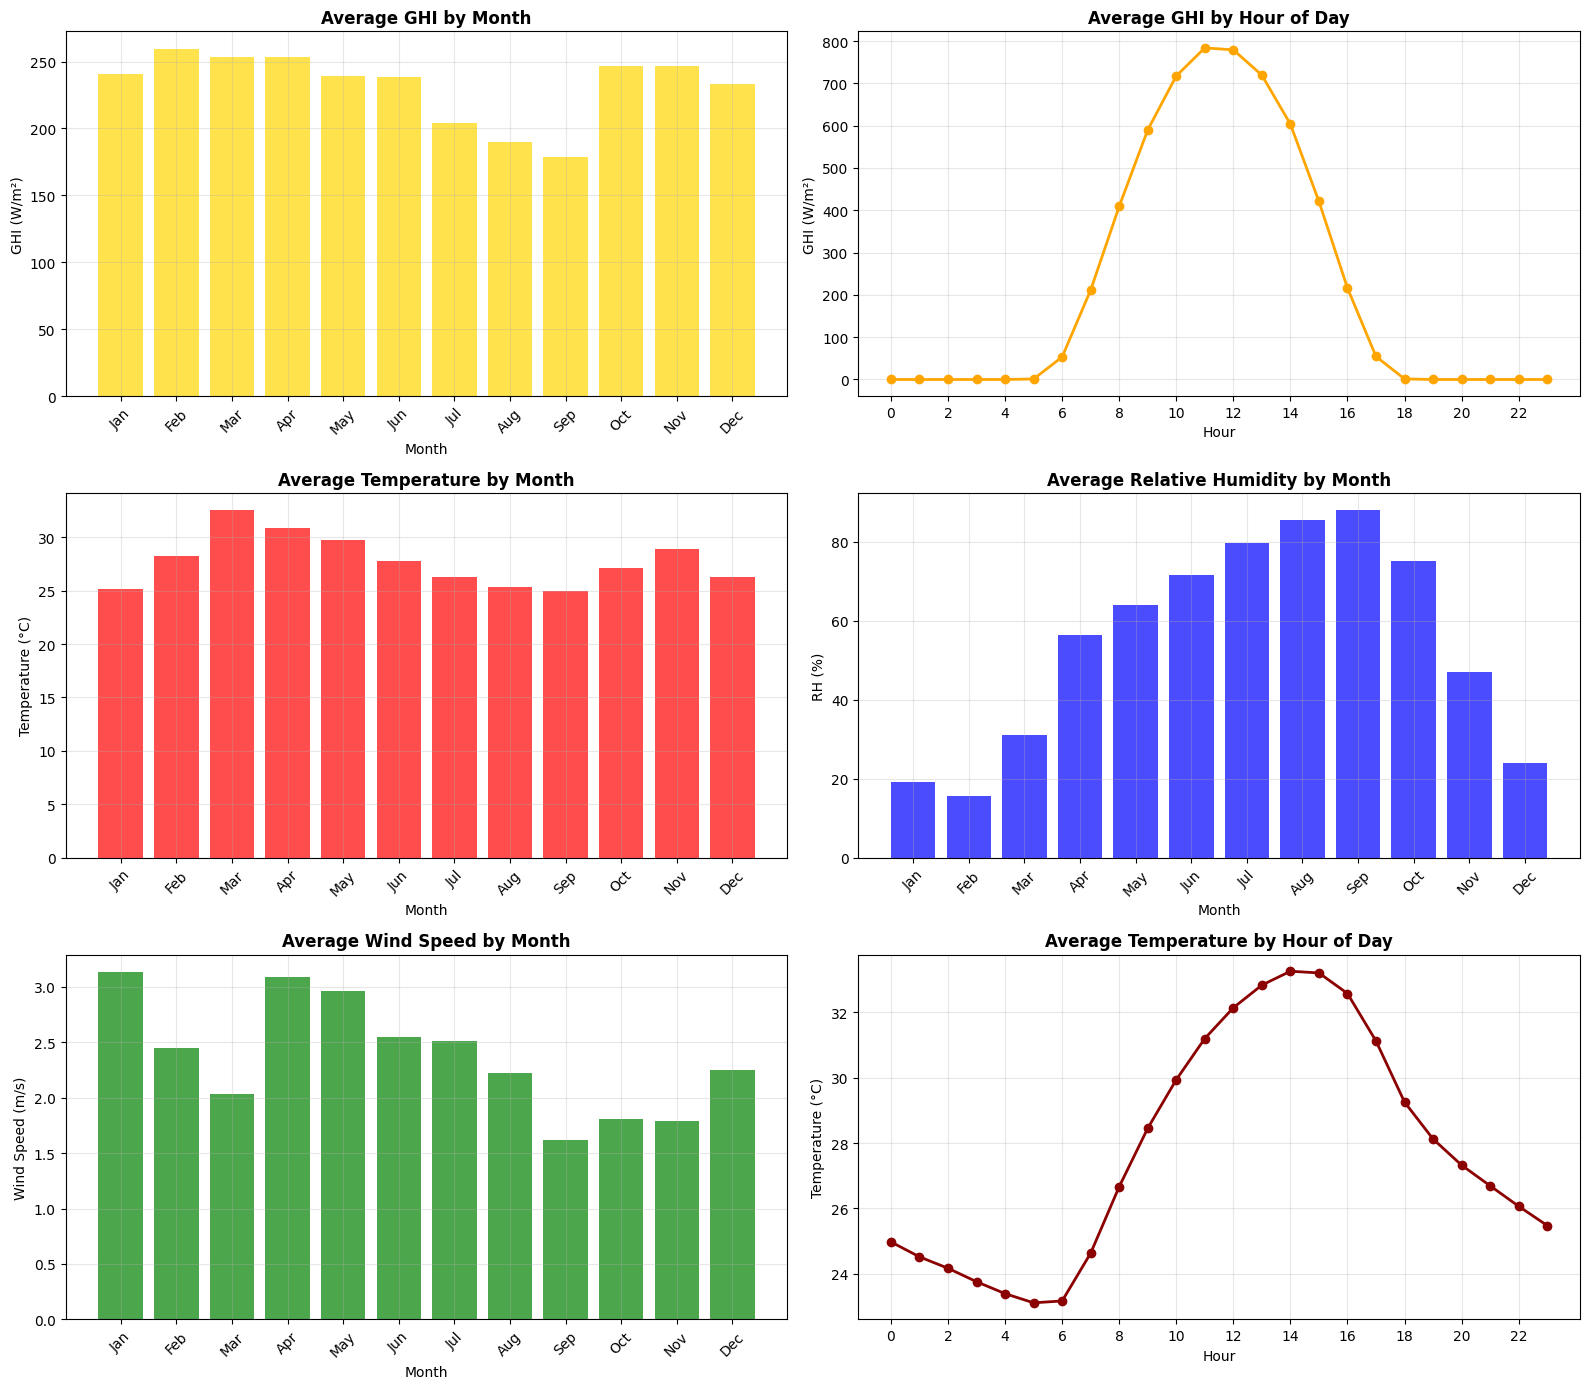

In [8]:

# Set timestamp as index AND extract month/hour from Timestamp
benin_ts = togo_clean.copy()
benin_ts['Timestamp'] = pd.to_datetime(benin_ts['Timestamp'])  # Ensure datetime
benin_ts = benin_ts.set_index('Timestamp')

# Extract month and hour from the index
benin_ts['month'] = benin_ts.index.month  # type: ignore
benin_ts['hour'] = benin_ts.index.hour    # type: ignore

print("ENHANCED TIME SERIES ANALYSIS")
print("="*45)

# Analyze data distribution by month and hour
monthly_stats = benin_ts.groupby('month').agg({
    'GHI': ['mean', 'max', 'std'],
    'Tamb': ['mean', 'max', 'min'],
    'RH': 'mean'
}).round(2)

print("\nMonthly Statistics:")
display(monthly_stats)

# Create enhanced time series visualization
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# 1. GHI Distribution by Month
monthly_ghi = benin_ts.groupby('month')['GHI'].mean()
axes[0,0].bar(monthly_ghi.index, monthly_ghi.values, color='gold', alpha=0.7)
axes[0,0].set_title('Average GHI by Month', fontweight='bold', fontsize=12)
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(1, 13))
axes[0,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 2. Daily Pattern - GHI
hourly_ghi = benin_ts.groupby('hour')['GHI'].mean()
axes[0,1].plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2, color='orange')
axes[0,1].set_title('Average GHI by Hour of Day', fontweight='bold', fontsize=12)
axes[0,1].set_xlabel('Hour')
axes[0,1].set_ylabel('GHI (W/m²)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xticks(range(0, 24, 2))

# 3. Temperature by Month
monthly_temp = benin_ts.groupby('month')['Tamb'].mean()
axes[1,0].bar(monthly_temp.index, monthly_temp.values, color='red', alpha=0.7)
axes[1,0].set_title('Average Temperature by Month', fontweight='bold', fontsize=12)
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Temperature (°C)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_xticks(range(1, 13))
axes[1,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 4. RH by Month
monthly_rh = benin_ts.groupby('month')['RH'].mean()
axes[1,1].bar(monthly_rh.index, monthly_rh.values, color='blue', alpha=0.7)
axes[1,1].set_title('Average Relative Humidity by Month', fontweight='bold', fontsize=12)
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('RH (%)')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_xticks(range(1, 13))
axes[1,1].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 5. Wind Speed by Month
monthly_ws = benin_ts.groupby('month')['WS'].mean()
axes[2,0].bar(monthly_ws.index, monthly_ws.values, color='green', alpha=0.7)
axes[2,0].set_title('Average Wind Speed by Month', fontweight='bold', fontsize=12)
axes[2,0].set_xlabel('Month')
axes[2,0].set_ylabel('Wind Speed (m/s)')
axes[2,0].grid(True, alpha=0.3)
axes[2,0].set_xticks(range(1, 13))
axes[2,0].set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)

# 6. Daily Temperature Pattern
hourly_temp = benin_ts.groupby('hour')['Tamb'].mean()
axes[2,1].plot(hourly_temp.index, hourly_temp.values, marker='o', linewidth=2, color='darkred')
axes[2,1].set_title('Average Temperature by Hour of Day', fontweight='bold', fontsize=12)
axes[2,1].set_xlabel('Hour')
axes[2,1].set_ylabel('Temperature (°C)')
axes[2,1].grid(True, alpha=0.3)
axes[2,1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

6. Correlation Analysis

 CORRELATION ANALYSIS


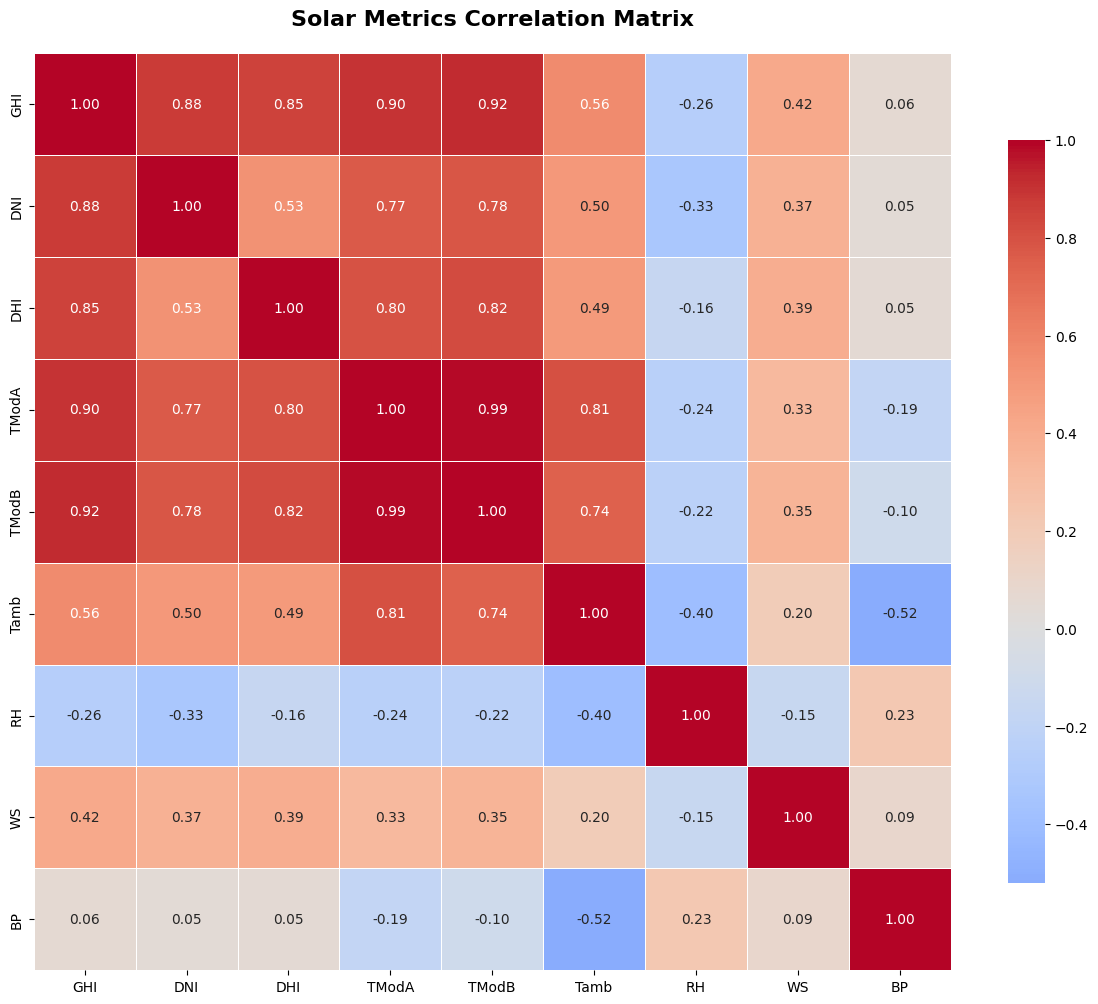


📊 Highly Correlated Variable Pairs (|r| > 0.8):
  • GHI vs DNI: r = 0.877
  • GHI vs DHI: r = 0.852
  • GHI vs TModA: r = 0.898
  • GHI vs TModB: r = 0.919
  • DHI vs TModA: r = 0.802
  • DHI vs TModB: r = 0.820
  • TModA vs TModB: r = 0.985
  • TModA vs Tamb: r = 0.806


In [9]:

print(" CORRELATION ANALYSIS")
print("="*40)

# Create comprehensive correlation matrix
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS', 'BP']
corr_matrix = togo_clean[corr_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Solar Metrics Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identify highly correlated pairs
print("\n📊 Highly Correlated Variable Pairs (|r| > 0.8):")
high_corr_pairs = []
for i in range(len(corr_columns)):
    for j in range(i+1, len(corr_columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.8: 
            high_corr_pairs.append((corr_columns[i], corr_columns[j], corr_matrix.iloc[i, j]))

for var1, var2, corr in high_corr_pairs:
    print(f"  • {var1} vs {var2}: r = {corr:.3f}")

6. Cleaning Impact Analysis


🧽 CLEANING IMPACT ANALYSIS
Cleaning events distribution:
  • Before cleaning: 525,319 records (99.95%)
  • After cleaning: 281 records (0.05%)


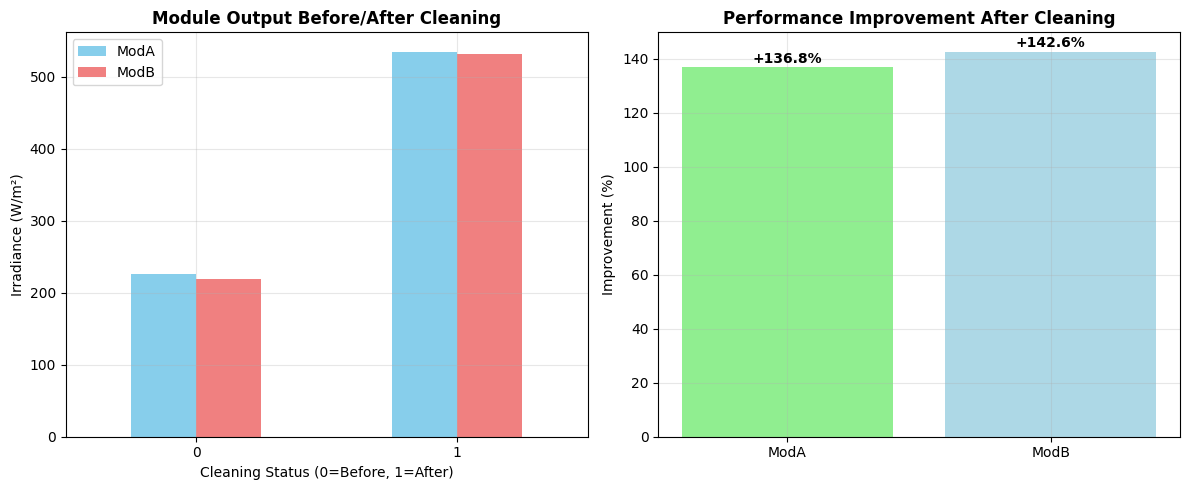


📊 Statistical Significance Test:
  • ModA t-test p-value: 0.000000
  • Result: Significant difference


In [10]:

print("🧽 CLEANING IMPACT ANALYSIS")
print("="*35)

if 'Cleaning' in togo_clean.columns:
    # Calculate cleaning statistics
    cleaning_counts = togo_clean['Cleaning'].value_counts().sort_index()
    print(f"Cleaning events distribution:")
    for cleaning_status, count in cleaning_counts.items():
        status = "After cleaning" if cleaning_status == 1 else "Before cleaning"
        print(f"  • {status}: {count:,} records ({count/len(togo_clean)*100:.2f}%)")
    
    # Enhanced cleaning impact visualization
    plt.figure(figsize=(12, 5))
    
    # Plot 1: Bar chart of average module outputs
    plt.subplot(1, 2, 1)
    cleaning_impact = togo_clean.groupby('Cleaning')[['ModA', 'ModB']].mean()
    cleaning_impact.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
    plt.title('Module Output Before/After Cleaning', fontweight='bold')
    plt.ylabel('Irradiance (W/m²)')
    plt.xlabel('Cleaning Status (0=Before, 1=After)')
    plt.xticks(rotation=0)
    plt.legend(['ModA', 'ModB'])
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Percentage improvement
    plt.subplot(1, 2, 2)
    if len(cleaning_impact) > 1:
        improvements = [
            ((cleaning_impact.loc[1, 'ModA'] - cleaning_impact.loc[0, 'ModA']) / cleaning_impact.loc[0, 'ModA']) * 100,
            ((cleaning_impact.loc[1, 'ModB'] - cleaning_impact.loc[0, 'ModB']) / cleaning_impact.loc[0, 'ModB']) * 100
        ]
        modules = ['ModA', 'ModB']
        bars = plt.bar(modules, improvements, color=['lightgreen', 'lightblue'])
        plt.title('Performance Improvement After Cleaning', fontweight='bold')
        plt.ylabel('Improvement (%)')
        
        # Add value labels on bars
        for bar, improvement in zip(bars, improvements):
            plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{improvement:+.1f}%', ha='center', va='bottom', fontweight='bold')
        
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Statistical significance test
    if len(cleaning_impact) > 1:
        from scipy.stats import ttest_ind
        moda_before = togo_clean[togo_clean['Cleaning'] == 0]['ModA']
        moda_after = togo_clean[togo_clean['Cleaning'] == 1]['ModA']
        
        t_stat, p_value = ttest_ind(moda_before, moda_after, equal_var=False)
        print(f"\n📊 Statistical Significance Test:")
        print(f"  • ModA t-test p-value: {p_value:.6f}")
        print(f"  • Result: {'Significant difference' if p_value < 0.05 else 'No significant difference'}")



7. Feature Selection & Multicollinearity Handling

FEATURE SELECTION & MULTICOLLINEARITY HANDLING
Dropped redundant features to handle multicollinearity:

Remaining columns: 22
Features: ['Timestamp', 'GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'hour', 'GHI_outlier', 'DNI_outlier', 'DHI_outlier', 'ModA_outlier', 'ModB_outlier', 'WS_outlier', 'WSgust_outlier']


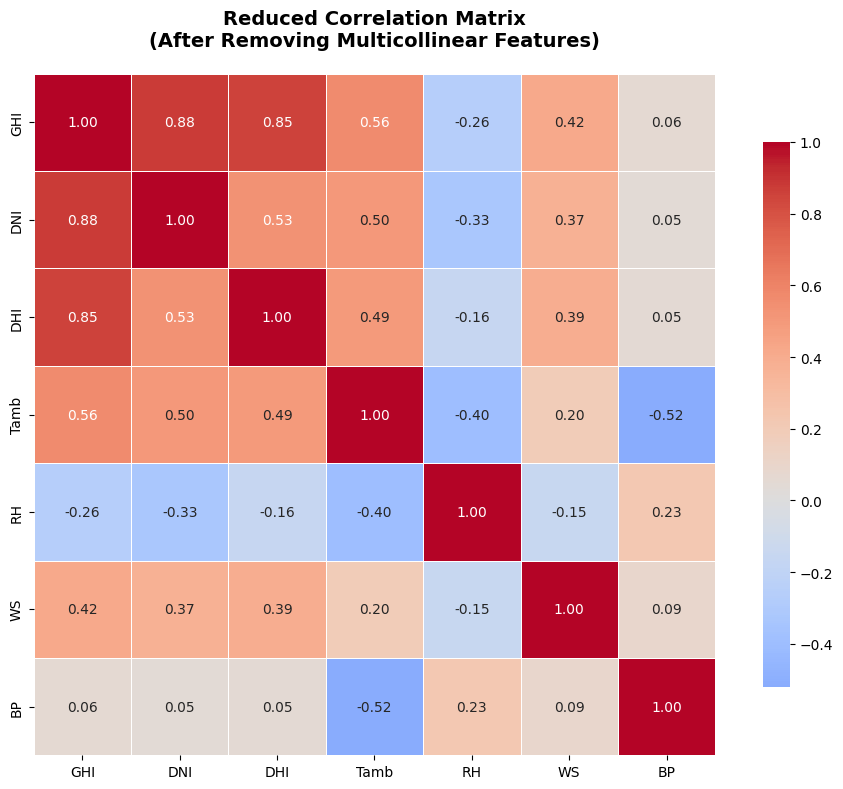

In [11]:

print("FEATURE SELECTION & MULTICOLLINEARITY HANDLING")
print("="*50)

# Create copy for feature selection
togo_features = togo_clean.copy()

# Drop redundant features to avoid multicollinearity
columns_to_drop = ['TModA', 'TModB', 'ModA', 'ModB']
togo_features = togo_features.drop(columns=[col for col in columns_to_drop if col in togo_features.columns])

print("Dropped redundant features to handle multicollinearity:")
for col in columns_to_drop:
    if col in togo_features.columns:
        print(f"  • Removed: {col}")

print(f"\nRemaining columns: {len(togo_features.columns)}")
print("Features:", togo_features.columns.tolist())

# Verify correlation reduction
remaining_corr_cols = [col for col in corr_columns if col in togo_features.columns]
reduced_corr_matrix = togo_features[remaining_corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(reduced_corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Reduced Correlation Matrix\n(After Removing Multicollinear Features)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [12]:
togo_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Timestamp       525600 non-null  datetime64[ns]
 1   GHI             525600 non-null  float64       
 2   DNI             525600 non-null  float64       
 3   DHI             525600 non-null  float64       
 4   Tamb            525600 non-null  float64       
 5   RH              525600 non-null  float64       
 6   WS              525600 non-null  float64       
 7   WSgust          525600 non-null  float64       
 8   WSstdev         525600 non-null  float64       
 9   WD              525600 non-null  float64       
 10  WDstdev         525600 non-null  float64       
 11  BP              525600 non-null  int64         
 12  Cleaning        525600 non-null  int64         
 13  Precipitation   525600 non-null  float64       
 14  hour            525600 non-null  int

8. Scatter Plot Analysis

📊 SCATTER PLOT ANALYSIS


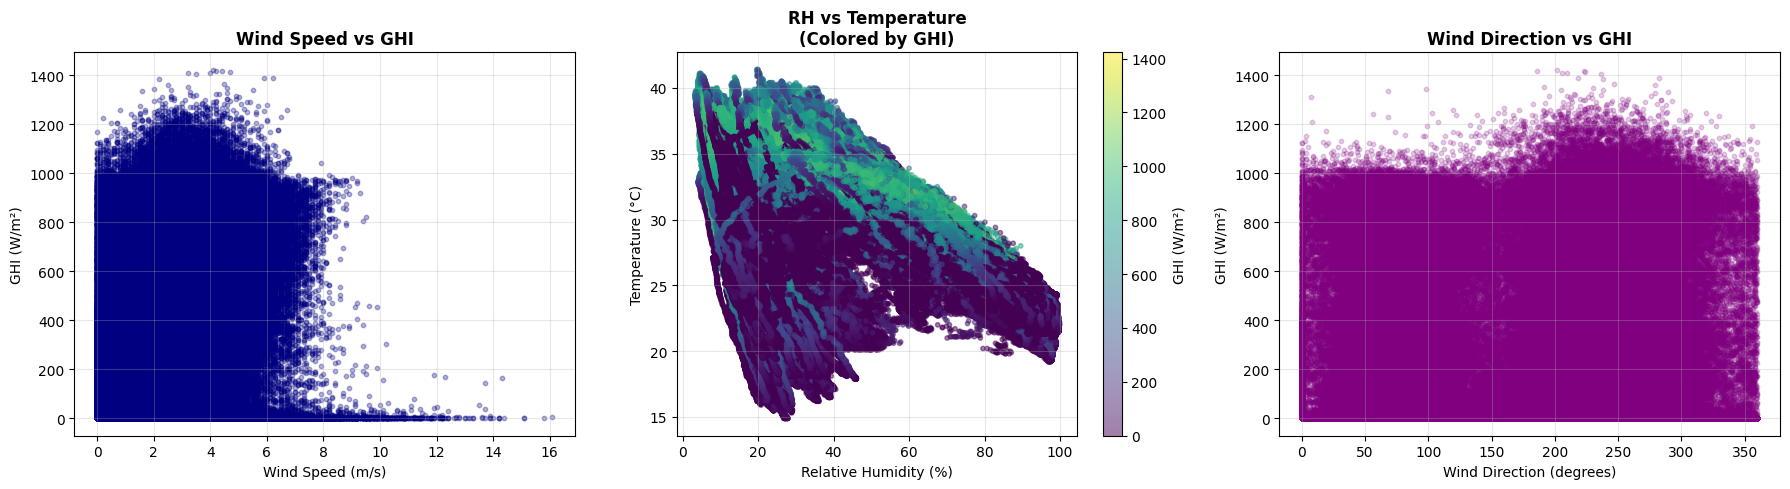

In [13]:

print("📊 SCATTER PLOT ANALYSIS")
print("="*45)

plt.figure(figsize=(18, 5))

# Plot 1: Wind Speed vs GHI
plt.subplot(1, 3, 1)
scatter1 = plt.scatter(togo_features['WS'], togo_features['GHI'], 
                      alpha=0.3, color='navy', s=10)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Speed vs GHI', fontweight='bold')
plt.grid(True, alpha=0.3)

# Plot 2: RH vs Temperature (colored by GHI)
plt.subplot(1, 3, 2)
scatter2 = plt.scatter(togo_features['RH'], togo_features['Tamb'], 
                      c=togo_features['GHI'], cmap='viridis', alpha=0.5, s=10)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.title('RH vs Temperature\n(Colored by GHI)', fontweight='bold')
plt.colorbar(scatter2, label='GHI (W/m²)')
plt.grid(True, alpha=0.3)

# Plot 3: Wind Direction vs GHI
plt.subplot(1, 3, 3)
scatter3 = plt.scatter(togo_features['WD'], togo_features['GHI'], 
                      alpha=0.2, color='purple', s=10)
plt.xlabel('Wind Direction (degrees)')
plt.ylabel('GHI (W/m²)')
plt.title('Wind Direction vs GHI', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Bubble Chart Analysis

Simple Bubble Chart: GHI vs Temperature


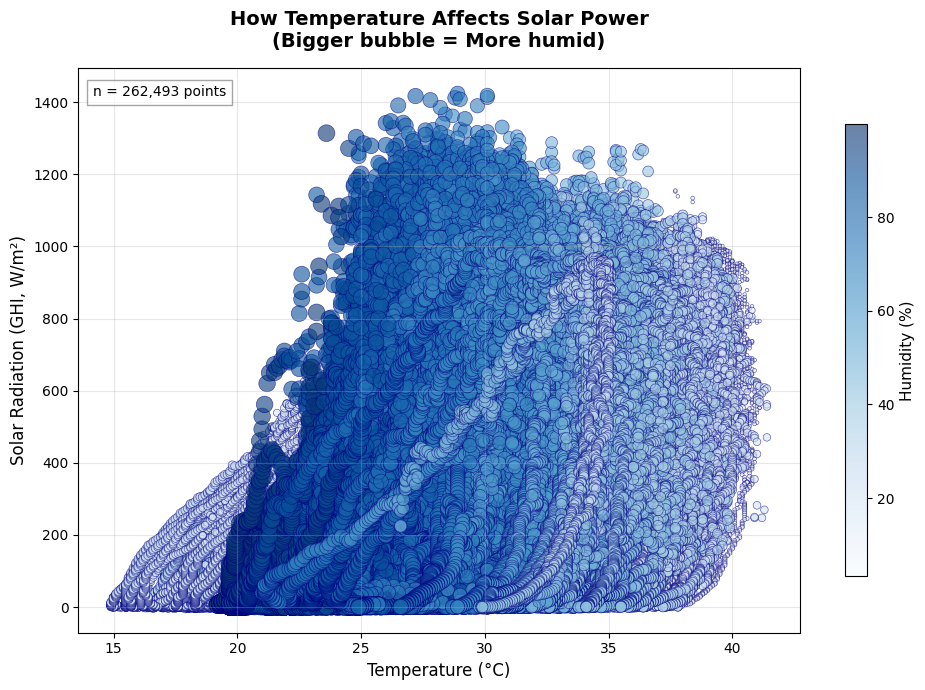

In [14]:

print("Simple Bubble Chart: GHI vs Temperature")
print("="*50)

plt.figure(figsize=(10, 7))

# Use only daytime data with positive GHI
daytime = togo_features[
    (togo_features['Timestamp'].dt.hour >= 6) & 
    (togo_features['Timestamp'].dt.hour <= 18) & 
    (togo_features['GHI'] > 0)
]

# Simple scatter with bubble size = humidity
plt.scatter(
    daytime['Tamb'],      # X: Temperature
    daytime['GHI'],       # Y: Solar Radiation
    s=daytime['RH'] * 1.5,  # Bubble size = Humidity (scaled)
    c=daytime['RH'],      # Color = Humidity
    cmap='Blues',         # Soft blue gradient
    alpha=0.6,
    edgecolor='navy',
    linewidth=0.5
)

# Labels & Title
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Solar Radiation (GHI, W/m²)', fontsize=12)
plt.title('How Temperature Affects Solar Power\n(Bigger bubble = More humid)', 
          fontsize=14, fontweight='bold', pad=15)

# Colorbar
cbar = plt.colorbar(label='Humidity (%)', shrink=0.8)
cbar.set_label('Humidity (%)', fontsize=11)

# Grid
plt.grid(True, alpha=0.3)

# Show count
plt.text(0.02, 0.95, f'n = {len(daytime):,} points', 
         transform=plt.gca().transAxes, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.tight_layout()
plt.show()

## 11. Final Data Export

In [15]:

# Remove outlier flags and temporary columns for final export
columns_to_drop = [col for col in togo_features.columns if any(x in col for x in ['_outlier', '_suspicious_zero', 'hour'])]
togo_final = togo_features.drop(columns=columns_to_drop)

output_dir  = Path('../data')          
output_path = output_dir / 'togo_clean.csv'

output_dir.mkdir(parents=True, exist_ok=True)

# Export cleaned data
togo_final.to_csv(output_path, index=False)
print(f"Cleaned data exported to: {output_path.resolve()}")

print(f"📊 Final dataset shape: {togo_final.shape}")
print(f"🗂️  Columns in final dataset: {len(togo_final.columns)}")
print("\n📋 Final feature set:")
for i, col in enumerate(togo_final.columns, 1):
    print(f"  {i:2d}. {col}")

Cleaned data exported to: C:\Users\hello\Desktop\solar-dataChallenge-week0\data\togo_clean.csv
📊 Final dataset shape: (525600, 14)
🗂️  Columns in final dataset: 14

📋 Final feature set:
   1. Timestamp
   2. GHI
   3. DNI
   4. DHI
   5. Tamb
   6. RH
   7. WS
   8. WSgust
   9. WSstdev
  10. WD
  11. WDstdev
  12. BP
  13. Cleaning
  14. Precipitation
